<a href="https://colab.research.google.com/github/sete50/navaraj/blob/main/Ann_Multiclass_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import builtin libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Combined Data.csv(1).zip')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.shape

(53043, 3)

In [ ]:
df.value_counts().sum()

np.int64(52681)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
# Assuming df is already loaded from the previous cell
if 'df' in locals():
    print(df.isnull().sum())
else:
    print("DataFrame 'df' not found. Please ensure the previous cell was executed successfully.")

Unnamed: 0      0
statement     362
status          0
dtype: int64


In [ ]:
df1 = df.dropna()
df1.shape

(52681, 3)

In [ ]:
# Preprocessing: removing irrelevant features
df_cleaned = df1.drop(columns=['Unnamed: 0'])
df_cleaned.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


In [ ]:
df_cleaned.shape

(52681, 2)

In [ ]:
df_cleaned ['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


<Axes: xlabel='status', ylabel='count'>

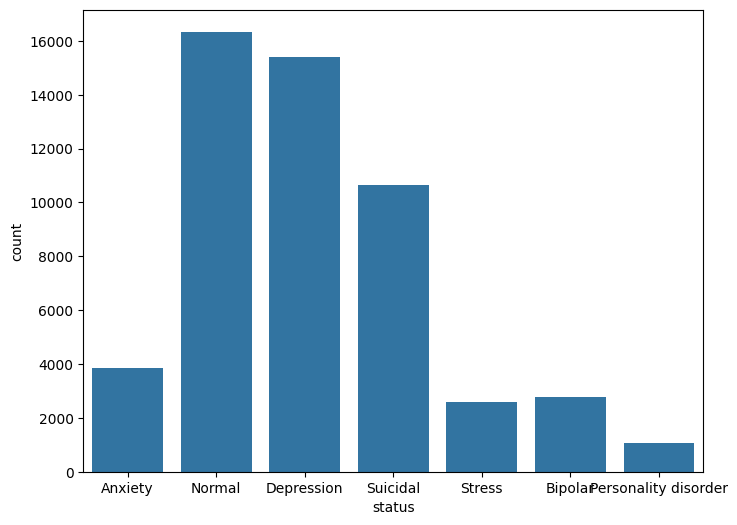

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df_cleaned)

In [ ]:
# preprocessing: lower casing and tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# lower casing and tokenizer
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens


In [ ]:
# import inbuilt libraries for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Define the preprocess function
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens


# Storing the tokenized output in a new column
df_cleaned['tokenized_statement'] = df_cleaned['statement'].apply(preprocess)
df_cleaned.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,statement,status,tokenized_statement
0,oh my gosh,Anxiety,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[all, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,Anxiety,"[i, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...",Anxiety,"[i, 'm, restless, and, restless, ,, it, 's, be..."


In [ ]:
# import tokenizer, pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Join the tokens for the Keras Tokenizer
texts = df_cleaned['tokenized_statement'].apply(lambda x: ' '.join(x))

# Initialize Tokenizer
max_words =5000
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")

# Fit the tokenizer to build the vocabulary
tokenizer.fit_on_texts(texts)

print(f"Vocabulary size: {len(tokenizer.word_index)}")

Vocabulary size: 60772


In [ ]:
# conversion of categorical values into integer
dummy_variables = pd.get_dummies(df_cleaned['encoded_status'], prefix='status_dummy')
df_cleaned = pd.concat([df_cleaned, dummy_variables], axis=1)
display(df_cleaned.head())

,statement,status,tokenized_statement,encoded_status,status_dummy_0,status_dummy_1,status_dummy_2,status_dummy_3,status_dummy_4,status_dummy_5,status_dummy_6
0,oh my gosh,Anxiety,"[oh, my, gosh]",0,True,False,False,False,False,False,False
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...",0,True,False,False,False,False,False,False
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[all, wrong, ,, back, off, dear, ,, forward, d...",0,True,False,False,False,False,False,False
3,I've shifted my focus to something else but I'...,Anxiety,"[i, 've, shifted, my, focus, to, something, el...",0,True,False,False,False,False,False,False
4,"I'm restless and restless, it's been a month n...",Anxiety,"[i, 'm, restless, and, restless, ,, it, 's, be...",0,True,False,False,False,False,False,False


In [ ]:
# 2. Converting text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Padding at the end

maxlen = 50
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

print(f"Original sequence example (first 5 tokens): {sequences[0][:5]}")
print(f"Padded sequence example (first 5 elements): {padded_sequences[0][:5]}")
print(f"Shape of padded sequences: {padded_sequences.shape}")

Original sequence example (first 5 tokens): [601, 6, 4821]
Padded sequence example (first 5 elements): [ 601    6 4821    0    0]
Shape of padded sequences: (52681, 50)


In [ ]:
from sklearn.model_selection import train_test_split

# Define the labels variable
labels = df_cleaned['encoded_status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.5, random_state=42
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 100 # Each word will be represented by a 100-dimensional vector
num_classes = len(label_encoder.classes_) # class number

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim ),
# model: Lstm
    LSTM(128),
  # Dense output layer for multi-class classification
    Dense(num_classes, activation='softmax')
])

model.build(input_shape= (None, maxlen))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 100)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,151 (2.36 MB)

 Trainable params: 618,151 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
labels = df_cleaned['encoded_status'].values
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, labels, epochs=8, batch_size=64)

Epoch 1/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.5472 - loss: 1.1384
Epoch 2/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.6541 - loss: 0.8100
Epoch 3/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 0.7523 - loss: 0.6349
Epoch 4/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.7882 - loss: 0.5464
Epoch 5/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 0.8134 - loss: 0.4838
Epoch 6/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.8360 - loss: 0.4370
Epoch 7/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 0.8570 - loss: 0.3802
Epoch 8/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.8689 - loss: 0.3477


Epoch 1/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 96s 117ms/step - accuracy: 0.8977 - loss: 0.2768
Epoch 2/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 90s 110ms/step - accuracy: 0.9103 - loss: 0.2454
Epoch 3/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 89s 108ms/step - accuracy: 0.9241 - loss: 0.2098
Epoch 4/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 88s 106ms/step - accuracy: 0.9366 - loss: 0.1797
Epoch 5/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 88s 107ms/step - accuracy: 0.9463 - loss: 0.1553
Epoch 6/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 90s 110ms/step - accuracy: 0.9550 - loss: 0.1340
Epoch 7/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 88s 107ms/step - accuracy: 0.9631 - loss: 0.1100
Epoch 8/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 92s 112ms/step - accuracy: 0.9689 - loss: 0.0943


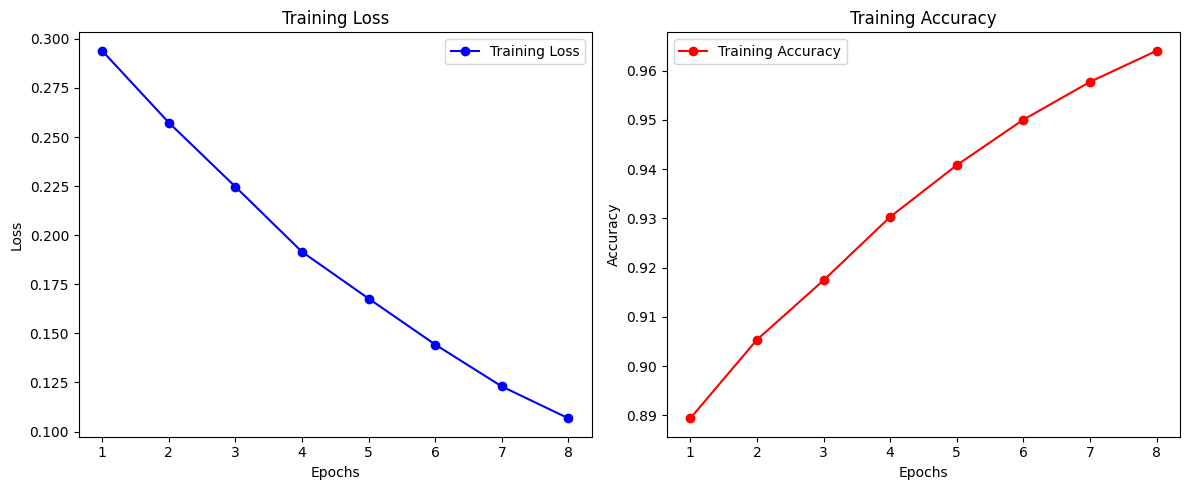

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(padded_sequences, labels, epochs=8, batch_size=64)

# Get training history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'ro-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.0742
Test Accuracy: 0.9774


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probabilities = model.predict(X_test)
# Convert probabilities for labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



824/824 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.97      0.99      0.98      1892
             Bipolar       0.98      0.98      0.98      1377
          Depression       0.98      0.96      0.97      7634
              Normal       0.99      0.99      0.99      8281
Personality disorder       0.98      0.98      0.98       539
              Stress       0.99      0.97      0.98      1277
            Suicidal       0.95      0.97      0.96      5341

            accuracy                           0.98     26341
           macro avg       0.98      0.98      0.98     26341
        weighted avg       0.98      0.98      0.98     26341




Confusion Matrix:
[[1864    5    8    9    2    2    2]
 [   5 1356    8    2    1    1    4]
 [   8    8 7346   34    3    2  233]
 [  28    7   10 8215    2    6   13]
 [   2    3    2    2  528    1    1]
 [   8    1   14    5    0 1245    4]
 [   1    1  135   11    1    0 5192]]


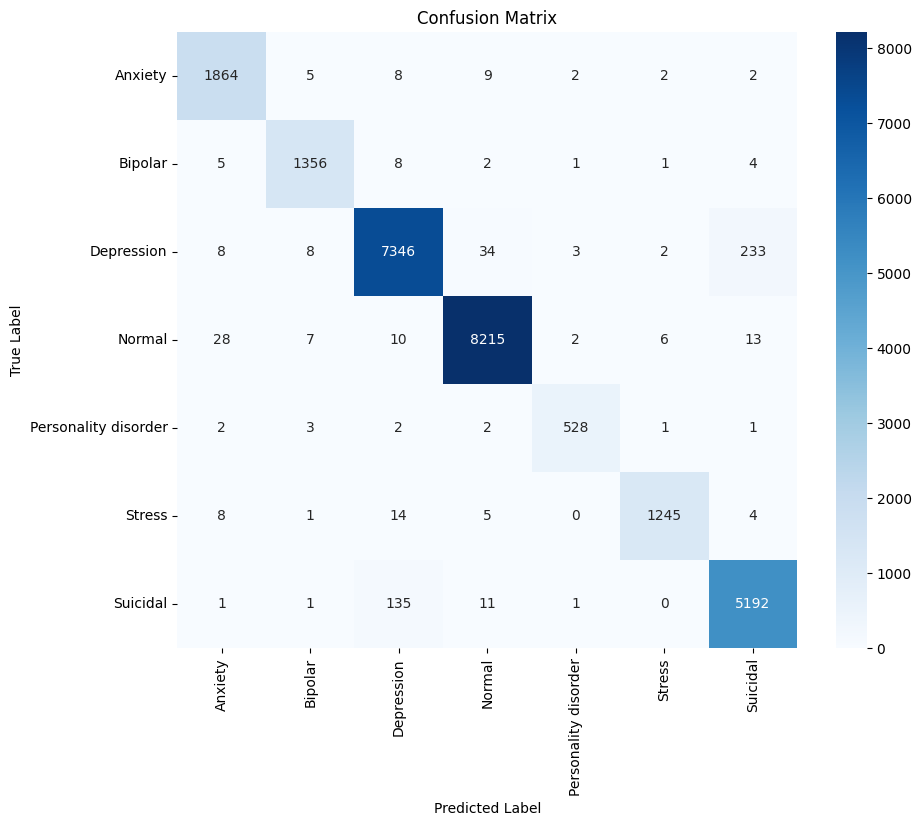

In [ ]:
# Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_dim = 100 # Example: each word will be represented by a 100-dimensional vector
num_classes = len(label_encoder.classes_) # Get the number of unique classes

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim ),
# model: BidirectionalLstm
    Bidirectional(LSTM(128)),
  # Dense output layer for multi-class classification
    Dense(num_classes, activation='softmax')
])

model.build(input_shape= (None, maxlen))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 100)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,295 (2.81 MB)

 Trainable params: 736,295 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
labels = df_cleaned['encoded_status'].values
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, labels, epochs=8, batch_size=64)

Epoch 1/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 173s 205ms/step - accuracy: 0.5820 - loss: 1.0428
Epoch 2/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 158s 191ms/step - accuracy: 0.7596 - loss: 0.6011
Epoch 3/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 207s 198ms/step - accuracy: 0.8030 - loss: 0.5018
Epoch 4/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 158s 192ms/step - accuracy: 0.8228 - loss: 0.4468
Epoch 5/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 161s 195ms/step - accuracy: 0.8465 - loss: 0.3903
Epoch 6/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 203s 196ms/step - accuracy: 0.8681 - loss: 0.3407
Epoch 7/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 162s 197ms/step - accuracy: 0.8851 - loss: 0.3000
Epoch 8/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 162s 196ms/step - accuracy: 0.9009 - loss: 0.2581


Epoch 1/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 192s 233ms/step - accuracy: 0.9179 - loss: 0.2197
Epoch 2/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 173s 198ms/step - accuracy: 0.9323 - loss: 0.1866
Epoch 3/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 163s 198ms/step - accuracy: 0.9452 - loss: 0.1527
Epoch 4/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 163s 198ms/step - accuracy: 0.9564 - loss: 0.1278
Epoch 5/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 213s 212ms/step - accuracy: 0.9661 - loss: 0.0996
Epoch 6/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 193s 201ms/step - accuracy: 0.9747 - loss: 0.0778
Epoch 7/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 159s 193ms/step - accuracy: 0.9805 - loss: 0.0662
Epoch 8/8
824/824 ━━━━━━━━━━━━━━━━━━━━ 204s 195ms/step - accuracy: 0.9827 - loss: 0.0564


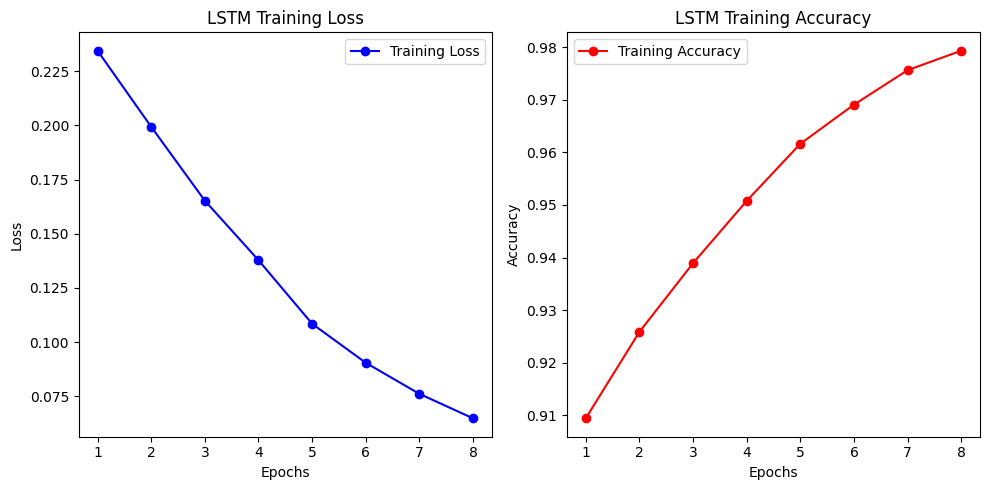

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(padded_sequences, labels, epochs=8, batch_size=64)

# Get training history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('BiLSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'ro-', label='Training Accuracy')
plt.title('BiLSTM Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Bi_LSTM Test Loss: {loss:.4f}')
print(f'Bi_LSTM Test Accuracy: {accuracy:.4f}')

Bi_LSTM Test Loss: 0.0436
Bi_LSTM Test Accuracy: 0.9877


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probabilities = model.predict(X_test)
# Convert probabilities for labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Display classification report
print("\n BiLSTMClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



824/824 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step

 BiLSTMClassification Report:
                      precision    recall  f1-score   support

             Anxiety       0.99      0.99      0.99      1892
             Bipolar       0.99      1.00      0.99      1377
          Depression       0.98      0.98      0.98      7634
              Normal       0.99      1.00      1.00      8281
Personality disorder       0.99      0.98      0.99       539
              Stress       0.99      0.99      0.99      1277
            Suicidal       0.98      0.98      0.98      5341

            accuracy                           0.99     26341
           macro avg       0.99      0.99      0.99     26341
        weighted avg       0.99      0.99      0.99     26341




Confusion Matrix:
[[1873    2    5    7    0    3    2]
 [   0 1373    2    0    0    1    1]
 [   6    2 7515   14    1    5   91]
 [   2    3    8 8255    1    5    7]
 [   0    3    4    3  527    1    1]
 [   2    0    3    4    1 1267    0]
 [   0    1  114   15    0    3 5208]]


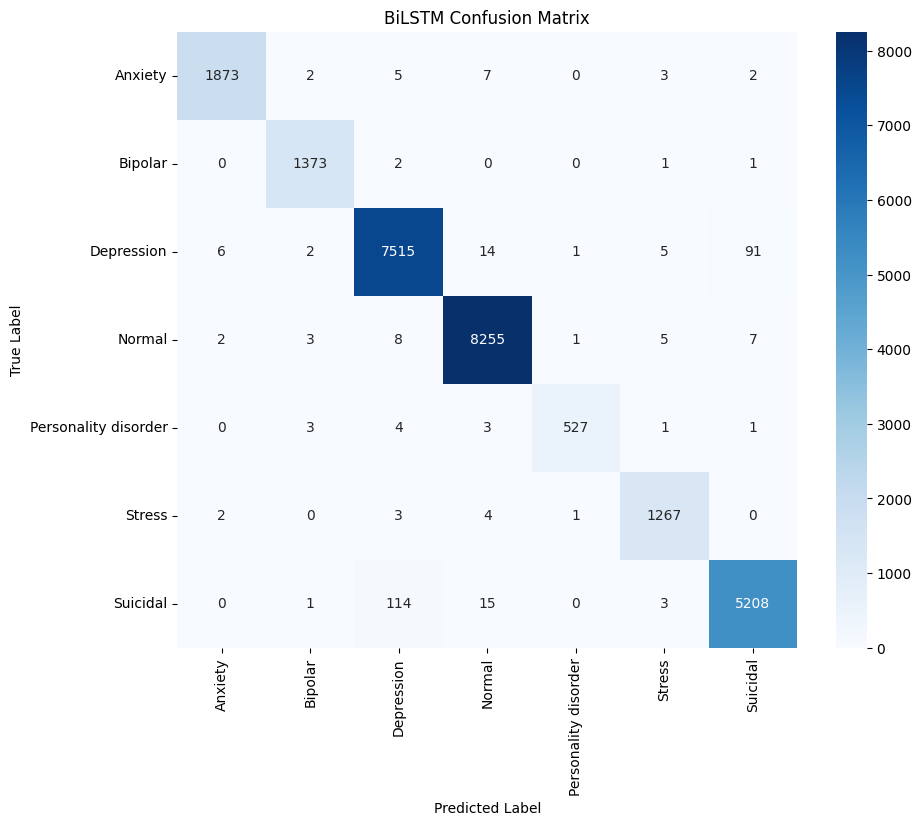

In [ ]:
# Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BiLSTM Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Re-create and train the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim ),
    LSTM(128),
    Dense(num_classes, activation='softmax')
])
model_lstm.build(input_shape= (None, maxlen))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(padded_sequences, labels, epochs=8, batch_size=64, verbose=0)

In [ ]:
# Re-create and train the Bi-LSTM
model_bilstm = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim ),
    Bidirectional(LSTM(128)),
    Dense(num_classes, activation='softmax')
])
model_bilstm.build(input_shape= (None, maxlen))
model_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bilstm = model_bilstm.fit(padded_sequences, labels, epochs=8, batch_size=64, verbose=0)

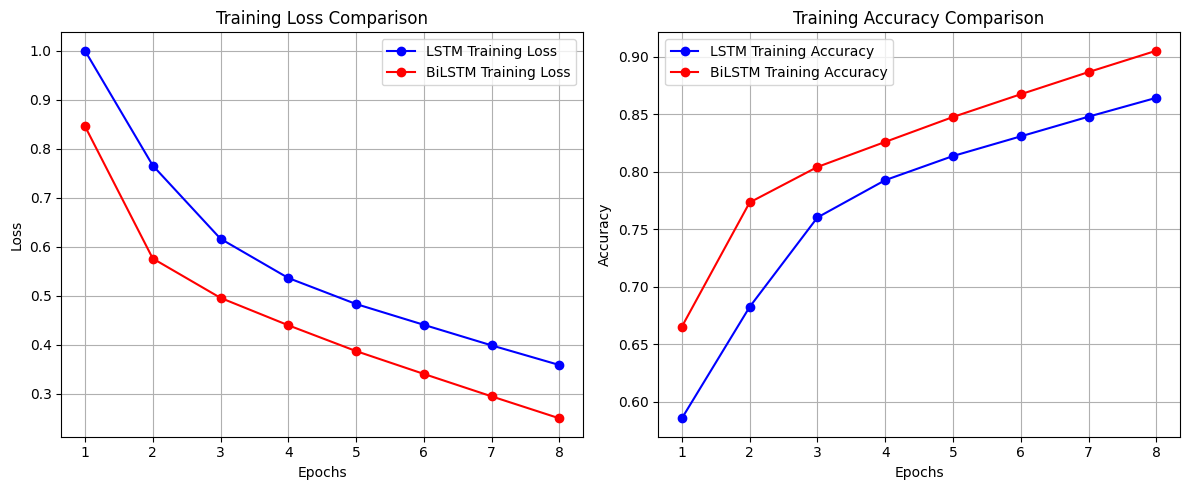

In [ ]:
# Get training history for LSTM
loss_lstm = history_lstm.history['loss']
accuracy_lstm = history_lstm.history['accuracy']
epochs = range(1, len(loss_lstm) + 1)

# Get training history for Bi-LSTM
loss_bilstm = history_bilstm.history['loss']
accuracy_bilstm = history_bilstm.history['accuracy']

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_lstm, 'bo-', label='LSTM Training Loss')
plt.plot(epochs, loss_bilstm, 'ro-', label='BiLSTM Training Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_lstm, 'bo-', label='LSTM Training Accuracy')
plt.plot(epochs, accuracy_bilstm, 'ro-', label='BiLSTM Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()